# **Introduction** 

### 1. Machine learning hayotda qanday ishlatiladi?

1. **Spam email aniqlash** – Email platformalari spamlarni avtomatik ajratib beradi. Bu foydalanuvchining vaqti va xavfsizligini saqlaydi. (Klassifikatsiya, **Supervised**)

2. **Uy narxini bashorat qilish** – Uylarning o‘lchami, joylashuvi asosida narxni aniqlash. Bu ko‘chmas mulk bozorida foydali. (Regression, **Supervised**)

3. **Kasallik tashxisini aniqlash** – Tibbiy ma’lumotlar asosida AI kasallik bor yoki yo‘qligini aytadi. (Klassifikatsiya, **Supervised**)

4. **Do‘konlarda mahsulot tavsiyasi** – Amazon kabi saytlar sizga nima xarid qilishni tavsiya qiladi. (Assotsiatsiya, **Unsupervised**)

5. **Yuzni tanish tizimi** – Telefon yoki xavfsizlik kamerasi orqali odamni aniqlaydi. (Klassifikatsiya, **Supervised**)


### 2. ML vazifalari turiga ajratish

| Misol                          | ML turi         |
|-------------------------------|-----------------|
| Spam email aniqlash           | Klassifikatsiya |
| Uy narxini bashorat qilish    | Regression      |
| Kasallik tashxisi             | Klassifikatsiya |
| Mahsulot tavsiyasi            | Assotsiatsiya   |
| Yuzni tanish                  | Klassifikatsiya |


### 3. Multiclass va Multilabel farqi

- **Multiclass**: Har bir obyekt faqat bitta klassga kiradi. Masalan: telefon - `Samsung` **yoki** `Apple` **yoki** `Huawei`.
- **Multilabel**: Har bir obyekt bir nechta klassga tegishli bo‘lishi mumkin. Masalan: film – `komediya`, `drama`, `romantik` – **hammasi birga** bo'lishi mumkin.

### 4. Uy narxi – regressionmi?

Ha, uy narxi – bu **regression** masalasi. Chunki narx – bu aniq raqam (masalan, 125000$). Ammo agar biz narxlarni `cheap`, `medium`, `expensive` kabi toifalarga ajratsak, bu **klassifikatsiya** muammosiga aylanishi mumkin.


# **Bonus**

## **Regression**

`Regression` — bu doimiy (continuous) sonli qiymatlarni bashorat qilish uchun ishlatiladigan ML turi.
Masalan:

- Uy narxini bashorat qilish (price = ?)

- Ob-havoni oldindan aytish (harorat 25°C bo‘ladi)

- Avtomobil yoqilg‘i sarfini aniqlash

👉 Regression natijasida real sonlar chiqadi: 23.4, 190000, 3.14 va h.k.

## **Classification** 

`Classification` — bu ma’lumotlarni oldindan berilgan klasslarga ajratish jarayoni.
Masalan:

- Email — spam yoki not spam

- Kasallik bor — ha yoki yo‘q

 - Kredit olish — tasdiqlangan, rad etilgan, ko‘rib chiqilmoqda

👉 Classification natijasida kategoriya chiqadi: yes/no, low/medium/high, A/B/C va h.k.

## **Clustering**

`Clustering` — bu nazoratsiz o‘rganish turi bo‘lib, ma’lumotlarni o‘xshashliklariga qarab guruhlarga ajratadi.
Asosiy xususiyati: yorliq (label) yo‘q.

Masalan:

- Mijozlarni xarid odatlariga qarab guruhlarga ajratish

- Veb-sahifalarni mavzusiga qarab klasterlash

- Suratdagi obyektlarni guruhlash

👉 Clustering natijasi: Cluster 1, Cluster 2, Cluster 3...

## **Association**

`Association` — bu ma’lumotlar orasidagi munosabat va qoidalarni aniqlash uchun ishlatiladi.
Masalan:

- Agar foydalanuvchi non sotib olsa, ko‘pincha sariyog' ham sotib oladi

- "Market Basket Analysis" (bozor savat tahlili)

👉 Bu turdagi algoritmlar A → B shaklida qoidalar hosil qiladi:

{non, sut} → {shakar}

# **Main** 

### **Importing Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


### **Importing Data**

In [9]:
df = pd.read_json("data/train.json")
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [10]:
df.shape

(49352, 15)

In [11]:
df.columns.tolist()

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [13]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [14]:
df.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [15]:
df_small = df[['bathrooms', 'bedrooms', 'interest_level', 'price']] # target is 'price'
df_small

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


### **Statistical analysis and plotting**

In [16]:
p_low = df_small['price'].quantile(0.01) # eng pastki narx (outlier)
p_low

1475.0

In [17]:
p_high = df_small['price'].quantile(0.99) # eng yuqori narx (outlier)
p_high

13000.0

In [18]:
df_cleaned = df_small[(df_small['price'] > p_low) & (df_small['price'] < p_high)].copy()
df_cleaned

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


### **Visualizations**

### Target analysis

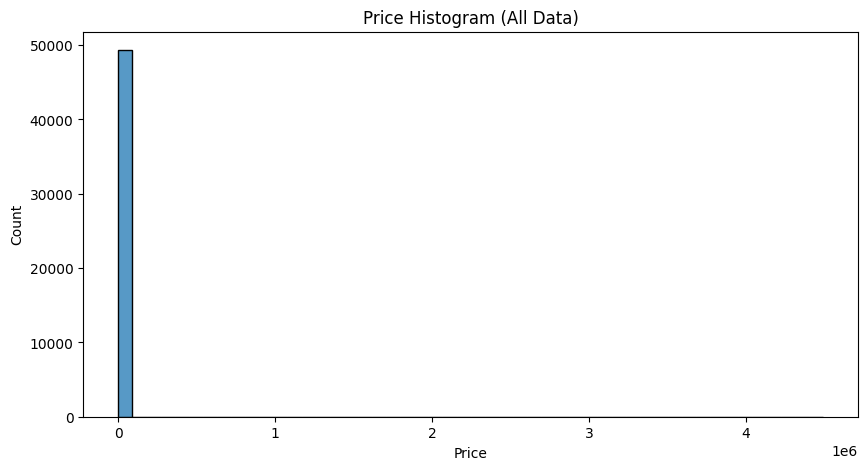

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df_small['price'], bins=50)
plt.title('Price Histogram (All Data)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

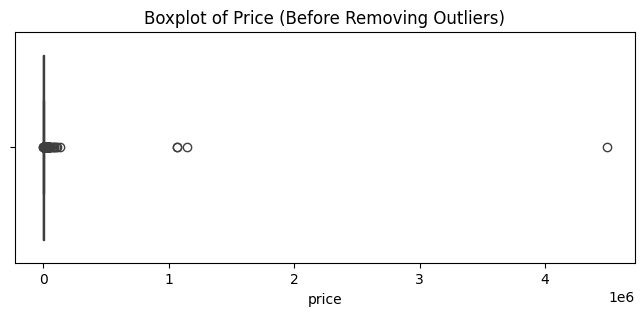

In [20]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df_small['price'])
plt.title("Boxplot of Price (Before Removing Outliers)")
plt.show()

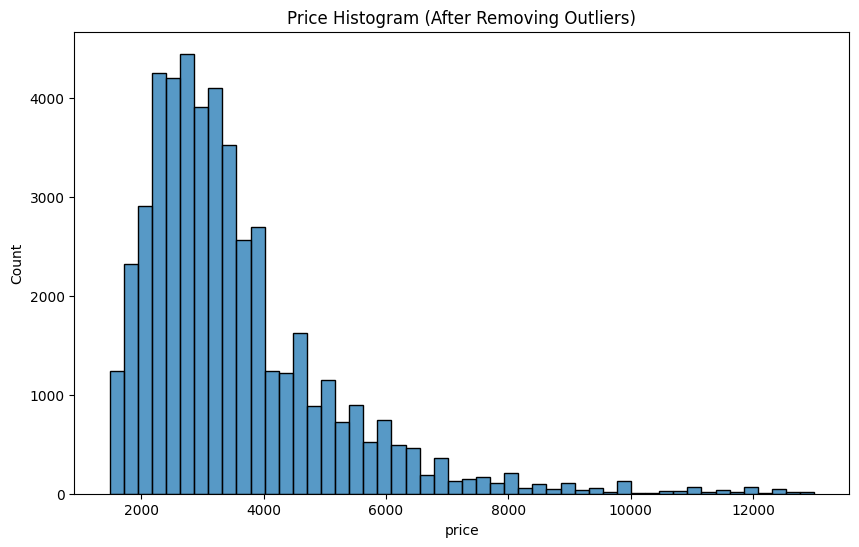

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50)
plt.title('Price Histogram (After Removing Outliers)')
plt.ylabel('Count')
plt.show()

### Characteristics Analysis

In [22]:
print("type of column 'interest_level':", df_cleaned['interest_level'].dtype)

type of column 'interest_level': object


In [23]:
# 'interest_level' ustunini kodlash 
df_cleaned['interest_level'] = df_cleaned['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
df_cleaned

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


In [24]:
print("Values in interest_level column:")
df_cleaned['interest_level'].value_counts()

Values in interest_level column:


interest_level
0    33672
1    11114
2     3557
Name: count, dtype: int64

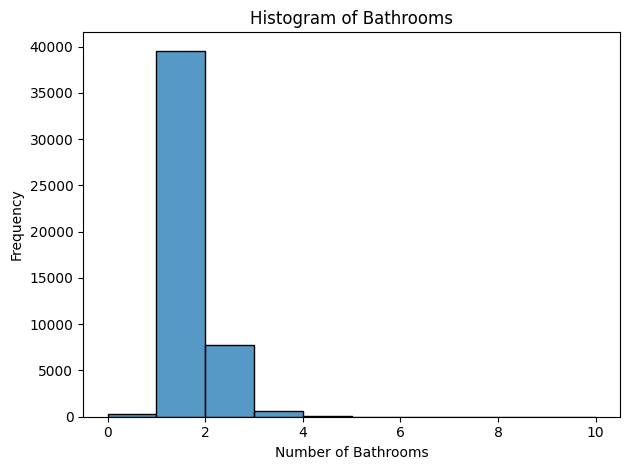

In [25]:
sns.histplot(df_cleaned['bathrooms'], bins=10)
plt.title("Histogram of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

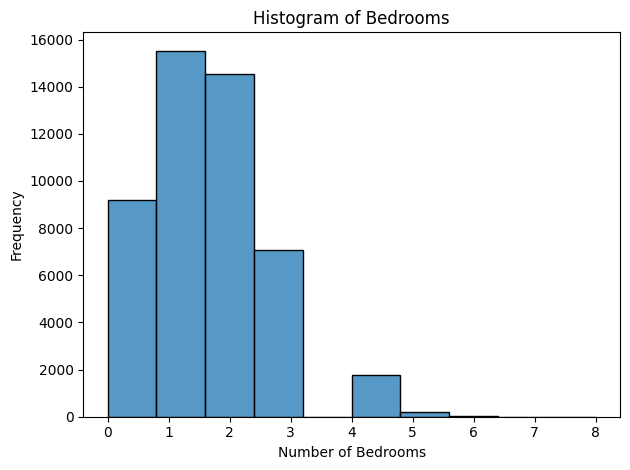

In [26]:
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].astype(float)

sns.histplot(df_cleaned['bedrooms'], binwidth=0.8)
plt.title("Histogram of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Complex analysis

In [27]:
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
corr_matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


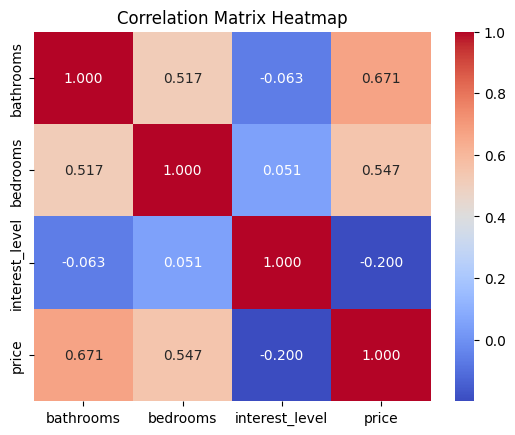

In [28]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Text(0.5, 1.0, 'Price vs Bathrooms')

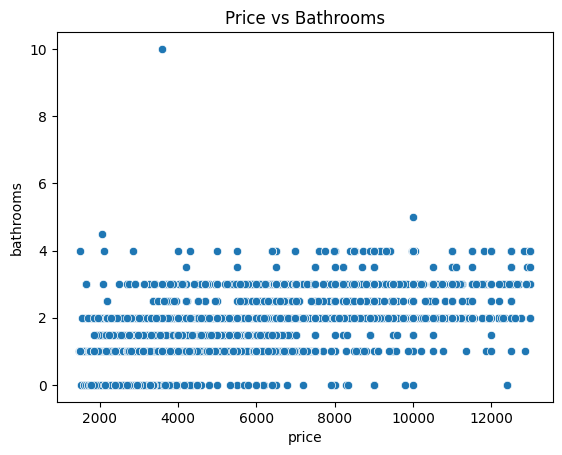

In [29]:
sns.scatterplot(x='price', y='bathrooms', data=df_cleaned)
plt.title('Price vs Bathrooms')

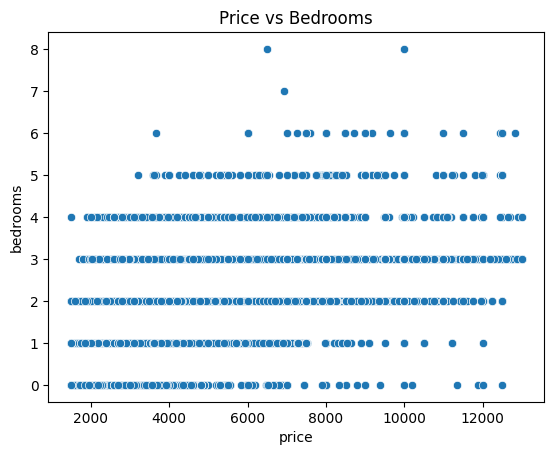

In [30]:
sns.scatterplot(x='price', y='bedrooms', data=df_cleaned)
plt.title('Price vs Bedrooms')
plt.show()

### Creating Features

In [31]:
df_cleaned['bathrooms_squared'] = df_cleaned['bathrooms'] ** 2
df_cleaned['bedrooms_squared'] = df_cleaned['bedrooms'] ** 2
df_cleaned['interest_level_squared'] = df_cleaned['interest_level'] ** 2
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
selected_rows = ['bathrooms', 'bedrooms', 'interest_level', 'price',
                 'bathrooms_squared', 'bedrooms_squared', 'interest_level_squared']
price_corr = corr_matrix.loc[selected_rows,  ['bathrooms', 'bedrooms', 'interest_level','price']]
price_corr

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000
bathrooms_squared,0.955906,0.478497,-0.067757,0.646949
bedrooms_squared,0.548426,0.928282,0.047048,0.544612
interest_level_squared,-0.058710,0.040125,0.943959,-0.182283


<Figure size 600x300 with 0 Axes>

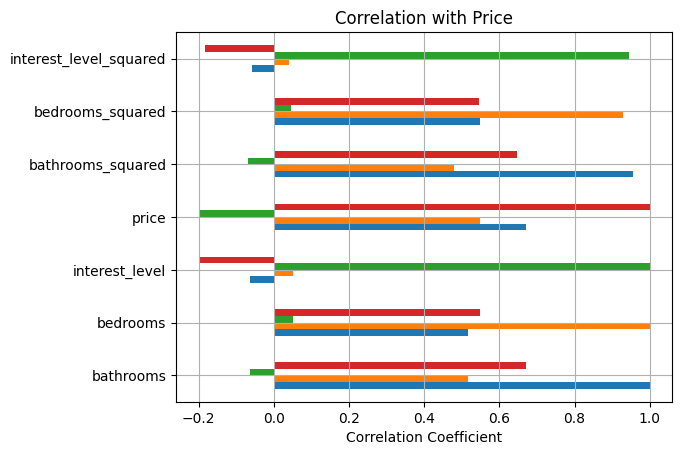

In [32]:
plt.figure(figsize=(6,3))
price_corr.plot(kind='barh', legend=False)
plt.title('Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()

### PolynomialFeatures

In [33]:
df2 = pd.read_json("data/test.json")
df2.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


### Preparation data

In [34]:
df2 = df2[['bathrooms', 'bedrooms', 'price']] # target is 'price'
df2

,bathrooms,bedrooms,price
0,1.0,1,2950
1,1.0,2,2850
2,1.0,0,2295
3,1.0,2,2900
5,1.0,1,3254
...,...,...,...
124003,1.0,1,1700
124005,1.0,2,4195
124006,1.0,0,2400
124007,2.0,2,6895


In [35]:
p_low1 = df2['price'].quantile(0.01)
p_low1

1495.0

In [36]:
p_high1 = df2['price'].quantile(0.99) 
p_high1

13000.0

In [37]:
df_cleaned1 = df2[(df2['price'] > p_low1) & (df2['price'] < p_high1)].copy()
df_cleaned1

,bathrooms,bedrooms,price
0,1.0,1,2950
1,1.0,2,2850
2,1.0,0,2295
3,1.0,2,2900
5,1.0,1,3254
...,...,...,...
124003,1.0,1,1700
124005,1.0,2,4195
124006,1.0,0,2400
124007,2.0,2,6895


In [38]:
features = ['bathrooms', 'bedrooms']
target = 'price'

In [39]:
X_train = df_cleaned[features]
y_train = df_cleaned[target]
X_test = df_cleaned1[features]
y_test = df_cleaned1[target]

In [40]:
# PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

### LinearRegression model

In [41]:
#  Linear Regression 
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)
y_pred_lr_train = lr_model.predict(X_train_poly)
y_pred_lr_test = lr_model.predict(X_test_poly)

mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))

result_MAE.loc[len(result_MAE)] = ['linear_regression', mae_lr_train, mae_lr_test]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', rmse_lr_train, rmse_lr_test]

### DecisionTreeRegressor model

In [42]:
# Decision Tree 
dt_model = DecisionTreeRegressor(random_state=21)
dt_model.fit(X_train_poly, y_train)
y_pred_dt_train = dt_model.predict(X_train_poly)
y_pred_dt_test = dt_model.predict(X_test_poly)

mae_dt_train = mean_absolute_error(y_train, y_pred_dt_train)
mae_dt_test = mean_absolute_error(y_test, y_pred_dt_test)
rmse_dt_train = np.sqrt(mean_squared_error(y_train, y_pred_dt_train))
rmse_dt_test = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

result_MAE.loc[len(result_MAE)] = ['decision_tree', mae_dt_train, mae_dt_test]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', rmse_dt_train, rmse_dt_test]

### Naive Models: predict `mean` va `median`

In [43]:
# Naive Mean Models (Oddiy modellar)
train_mean = y_train.mean()
y_pred_mean_train = np.full_like(y_train, train_mean)
y_pred_mean_test = np.full_like(y_test, train_mean)

mae_mean_train = mean_absolute_error(y_train, y_pred_mean_train)
mae_mean_test = mean_absolute_error(y_test, y_pred_mean_test)
rmse_mean_train = np.sqrt(mean_squared_error(y_train, y_pred_mean_train))
rmse_mean_test = np.sqrt(mean_squared_error(y_test, y_pred_mean_test))

result_MAE.loc[len(result_MAE)] = ['naive_mean', mae_mean_train, mae_mean_test]
result_RMSE.loc[len(result_RMSE)] = ['naive_mean', rmse_mean_train, rmse_mean_test]

# Naive Median
train_median = y_train.median()
y_pred_median_train = np.full_like(y_train, train_median)
y_pred_median_test = np.full_like(y_test, train_median)

mae_median_train = mean_absolute_error(y_train, y_pred_median_train)
mae_median_test = mean_absolute_error(y_test, y_pred_median_test)
rmse_median_train = np.sqrt(mean_squared_error(y_train, y_pred_median_train))
rmse_median_test = np.sqrt(mean_squared_error(y_test, y_pred_median_test))

result_MAE.loc[len(result_MAE)] = ['naive_median', mae_median_train, mae_median_test]
result_RMSE.loc[len(result_RMSE)] = ['naive_median', rmse_median_train, rmse_median_test] 


In [44]:
result_MAE # Mean Absolute Error

,model,train,test
0,linear_regression,760.958438,3003.867318
1,decision_tree,753.675997,756.203923
2,naive_mean,1134.316695,1130.843689
3,naive_median,1082.220859,1078.672733


In [45]:
result_RMSE # Root Mean Squared Error

,model,train,test
0,linear_regression,1086.485808,602719.782970
1,decision_tree,1070.598967,1072.431779
2,naive_mean,1585.609108,1573.237395
3,naive_median,1631.719953,1617.915709
